In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc
import re
rc('font',size=16)

In [4]:
def get_timings(filename):
    pattern = r'\bratio:\s*([-+]?(?:\d+\.\d+|\d+\.|\.\d+)(?:[eE][+-]?\d+)?)\b'
    with open(filename, 'r') as file:
        contents = file.read()
    matches = re.findall(pattern, contents)
    if len(matches) != 2:
        raise ValueError("Should be exactly three pattern matches")
    return [eval(m) for m in matches]

In [5]:
get_timings('nqt_skylake_o1_portable.dat')

[2.22033028505559, 1.75320007941413]

In [6]:
!cat nqt_skylake_o1_portable.dat

Invertibility of log10 (smaller is better):
	stdlib: 1.63941181554936e-17
	fast:   1.06042152543325e-16
Timings for pow10:
	stdlib: 5.39483330000000e+01 (ns/point)
	fast:   2.42974360000000e+01 (ns/point)
	ratio:  2.22033028505559e+00
Timings for log10:
	stdlib: 2.65803190000000e+01 (ns/point)
	fast:   1.51610300000000e+01 (ns/point)
	ratio:  1.75320007941413e+00


In [7]:
machines = ['skylake','skylake_intel',
            'spr','spr_intel',
            'rome','grace','M2',
            'V100','A100','H100']
orders = ["1","2"]
portabilities = ["portable","aliased"]

In [8]:
o1_portable_pows = []
o1_portable_logs = []
for m in machines:
    p,l = get_timings('nqt_{}_o1_portable.dat'.format(m))
    o1_portable_pows.append(p)
    o1_portable_logs.append(l)

o1_aliased_pows = []
o1_aliased_logs = []
for m in machines:
    p,l = get_timings('nqt_{}_o1_aliased.dat'.format(m))
    o1_aliased_pows.append(p)
    o1_aliased_logs.append(l)

o2_portable_pows = []
o2_portable_logs = []
for m in machines:
    p,l = get_timings('nqt_{}_o2_portable.dat'.format(m))
    o2_portable_pows.append(p)
    o2_portable_logs.append(l)

o2_aliased_pows = []
o2_aliased_logs = []
for m in machines:
    p,l = get_timings('nqt_{}_o2_aliased.dat'.format(m))
    o2_aliased_pows.append(p)
    o2_aliased_logs.append(l)

In [9]:
o1_portable_pows

[2.22033028505559,
 0.729025862638463,
 2.19568911127489,
 0.883416885183127,
 2.28214905629429,
 0.825429081966247,
 0.820380768647304,
 1.22797276605,
 1.88124923644274,
 1.47253320924628]

In [10]:
o1_aliased_pows

[4.0289012885216,
 4.42564632692848,
 3.07548685808176,
 3.88879251290868,
 3.18111163850614,
 1.18088597423762,
 1.51907247614281,
 1.3672165195792,
 1.8990573247885,
 1.48215144453294]

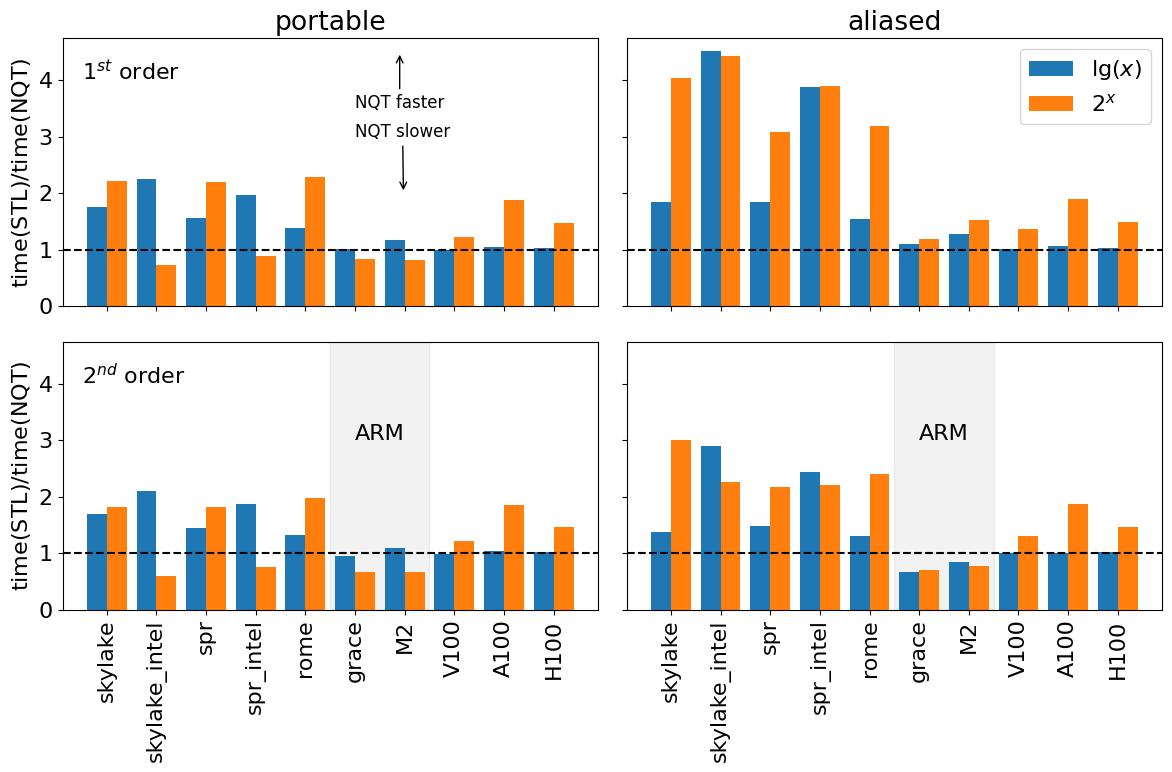

In [12]:
bar_width = 0.4
index = np.arange(len(machines))+1
fig, axarr = plt.subplots(2,2,sharex=True, sharey=True,figsize=(12,8))

for j in range(2):
    axarr[1,j].axvspan(5.5, 7.5, color='grey', 
                       alpha=0.1, 
                       label='ARM')
    axarr[1,j].annotate('ARM', (6, 3))

axarr[0,0].bar(index - bar_width/2, o1_portable_logs, bar_width, 
               label=r'lg$(x)$')
axarr[0,0].bar(index + bar_width/2, o1_portable_pows, bar_width, 
               label=r'$2^x$')

axarr[0,1].bar(index - bar_width/2, o1_aliased_logs, bar_width,
                label=r'lg$(x)$')
axarr[0,1].bar(index + bar_width/2, o1_aliased_pows, bar_width, 
               label=r'$2^x$')

axarr[1,0].bar(index - bar_width/2, o2_portable_logs, bar_width,
               label=r'lg$(x)$')
axarr[1,0].bar(index + bar_width/2, o2_portable_pows, bar_width,
               label=r'$2^x$')

axarr[1,1].bar(index - bar_width/2, o2_aliased_logs, bar_width,
               label=r'lg$(x)$')
axarr[1,1].bar(index + bar_width/2, o2_aliased_pows, bar_width,
               label=r'$2^x$')

axarr[0,1].legend()
axarr[1,1].annotate('parity', (-1,1.25))

axarr[0,0].annotate("NQT faster", 
                    xytext=(6,3.5),
                    xy=(6.9,4.5),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=12,
                    color='black')

axarr[0,0].annotate("NQT slower", 
                    xytext=(6,3.),
                    xy=(6.975,2.),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=12,
                    color='black')

for i in range(2):
    axarr[i,0].set_ylabel(r'time(STL)$/$time(NQT)')

for j in range(2):
    axarr[1,j].set_xticks(index)
    axarr[1,j].set_xticklabels(machines,rotation=90)

for i in range(2):
    for j in range(2):
        axarr[i,j].axhline(1.0, 0, index[-1]+1, color='k',linestyle='--')

axarr[0,0].annotate(r'$1^{st}$ order', (0.5,4))
axarr[1,0].annotate(r'$2^{nd}$ order', (0.5,4))
axarr[0,0].set_title('portable')
axarr[0,1].set_title('aliased')

plt.tight_layout()

plt.savefig('nqt_speedups.png',bbox_inches='tight')
plt.savefig('nqt_speedups.pdf',bbox_inches='tight')